# K-means

<img src="./figures/kmeans.jpg" width="700px"/>

## Exercice


### Generate data
1. Le code de cette section génère des data appartenant à 3 classes différentes.<br>
   Les clusters sont relativement séparés et devraient pouvoir être reconstruits de manière acceptable grâce à l'algorithme d'apprentissage non-supervisé des **K moyennes** ou **K-means**.<br>
   Comprenez ce code...
   
   
### Model
2. Compétez la méthode `_initialize_centroids(...)` qui, étant donné un ensemble de points `X` (**features**), retourne un array de $K$ centroïdes au hasard, où $K$ est le nombre de clusters désirés.


3. Compétez la méthode `_assign_clusters(..)` qui, étant donné un ensemble de points `X` et un ensemble de $K$ centroïdes `centroids`, retourne la liste des clusters associée aux points de `X`. 

   Pour chaque point $x$ de `X`, on calcule sa distance $d_i$ à chacun des centroïde $c_i$ de `centroids`, et on lui assigne le cluster $i$ pour lequelle la distance $d_i$ est minimale.
        

4. Compétez la méthode `_compute_centroids(...)` qui, étant donné un ensemble de points `X` et un ensemble de clusters correspondant `clusters`, recalcule les $K$ centroïdes `centroids` de ces clusters.

   Les $i$-ème centroïde $c_i$ correspond à la moyenne des points faisant partie cu cluster $i$.


5. Compétez la méthode `fit()`qui, étant donné un ensemble de points `X`, implémente l'algorithme **$K$-means** assoocié aux data `X`. Cette méthode retourne les `clusters` et `centroids` calculés par l'algorithme ci-dessous:
    
   <img src="./figures/kmeans_algo.jpg" width="700px"/>


6. Compétez la méthode `predict(...)` qui, étant donné un point `x_new`, calcule le cluster `c_new_hat` associée à ce point. La documentation de la méthode donne plus de détails.<br>



### Results
7. - Instanciez un **$K$-means** avec $K=3$;
   - Fittez votre algorithme sur les data `X`.
   - Faites le graphes de vos clusters. Les points qui sont prédits comme classe 1, classe 2 et classe 3 seront représentés de différentes couleurs.
   
   
### Generalization

8. Générez $10K$ points de dimension $10$ avec $5$ classes différentes (fonction `make_blobs`).<br>
Visualiizez vos point en dimension $2$ grâce à l'algorithme t-SNE:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html<br>
Puis réentraînez votre algorithme $K$-means sur ce nouveau dataset, et visualizez les clusters obtenus et leurs centroïdes à nouveau par le biais de l'algorithme t-SNE.

## Libraries

In [1]:
from collections import Counter

import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set_theme()

## Generate data

In [2]:
# generate data
X, y = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=4.0, random_state=42)

In [6]:
X.shape, y.shape

((500, 2), (500,))

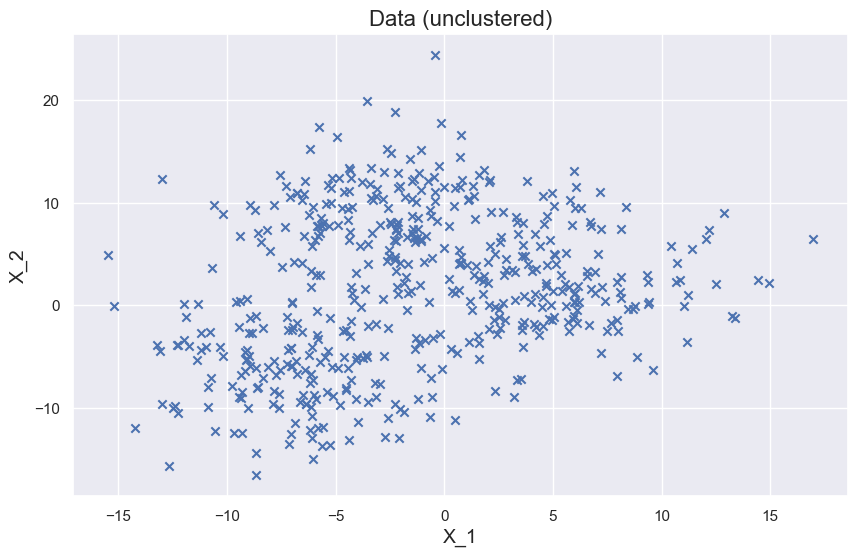

In [4]:
# plot data
plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1],marker = 'x')
plt.xlabel("X_1", fontsize=14)
plt.ylabel("X_2", fontsize=14)
# plt.legend(fontsize=14)
plt.title("Data (unclustered)", fontsize=16)

# plt.savefig("kmeans.jpg")
plt.show()

## Model

In [23]:
class Kmeans():
    """
    Implements the K-means algorithm.
    """
    
    def __init__(self, k=3):
        """
        Constructor.
        
        Parameters
        ----------
        
        k : int
            Number of clusters to be constructed.
        """
        
        self.k = k
        self.clusters = []
        self.centroids = None
        
    
    def _initialize_centroids(self, X):
        """
        Initialize k centroids from a normal distribution.
        The mean of the distribution is the mean of the data X.
        The std of the distribution is 1.0.
        The k centroids are stored into an array.
        
        Parameters
        ----------
        X : ndarray
            Initial data of dim N x p.
            
        Returns
        -------
        centroids : ndarray
            Array of k random centroids, each of dim p (k x p).
        """
        self.centroids = np.random.normal(loc=0, scale=1, size=(self.k, X.shape[1]))

    
    def _assign_clusters(self, X, centroids):
        """
        Given the data X and the current centroids,
        this function computes the cluster assignment
        of the data.
        
        Each data point of X is assigned to the cluster
        whose centroid is the closest to it.
        
        Parameters
        ----------
        X : ndarray
            Initial data of dim N x p.
        centroids : ndarray
            Array of k centroids (dim k x X.shape[1]).
            
        Returns
        -------
        clusters : ndarray
            Array of clusters assigned to the points of X 
            (dim X.shape[0]).
        """

        for x in X :
            distances = np.linalg.norm(x - centroids, axis=1)
            c = int(np.argmin(distances))
            self.clusters.append(c)
        
    
    def _compute_centroids(self, X, clusters):
        """
        Compute the new centroids of the data X according to
        their cluster assignment clusters.
        
        Parameters
        ----------
        X : ndarray
            Initial data of dim N x p
        clusters : ndarray
            Array of clusters assigned to the points of X 
            (dim X.shape[0]).
        
        Returns
        -------
        centroids : ndarray
            Array of k centroids (dim k x X.shape[1]).
        """
        centroids = np.ones(shape=(self.k, X.shape[1]))
        for i in range(self.k):
            X_class = X[clusters == i]
            centroids[i] = np.mean(X_class, axis=0)
        return centroids
    
    
    def fit(self, X, stop_dist=0.01, max_iter=1000):
        """
        Implements the K-means algorithm for the data X.
        
        First, the algorithm initializes random centroids
        via the _initialize_centroids methods. 
        Then, the algorithm alternates between the
        _assign_clusters and the _compute_centroids methods
        until a stop criterion is met.
        The algorithm stops when the distances between the 
        previous and new centroids hasn't changed too much,
        i.e., is less than stop_dist, or when the maximum
        number of iterations has been reached.
        The method re-assigns the attributes self.clusters
        and self.centroids to the clusters and centroids
        that it has computed.
        
        Parameters
        ----------
        X : ndarray
            Initial data of dim N x p.
        stop_dist : float
            Minimal distance between previous and new centroid
        max_iter : int
            maximum number of iterations.
        
        Returns
        -------
        clusters, centroids : ndarray, ndarray
            Array of clusters assigned to the points of X 
            (dim X.shape[0]).
            Array of k centroids (dim k x X.shape[1]).
        """
        iter = 0
        distance = [0]*k
        pass
        
        
    def predict(self, x_new):
        """
        Computes the cluster prediction c_new_hat associated 
        to a new point x_new. The cluster c_new_hat is the one 
        whose centroid is the closest to x_new.

        Parameters
        ----------
        x_new : Union[ndarray, list]
            New point of dim p to be classified by the $K$-means algo.
            
        Returns
        -------
        c_new_hat : int
            Cluster prediction for the point x_new.
        """
        
        pass

## Results

In [24]:
np.random.seed(42)
kmeans = Kmeans(k=3)
kmeans.k

3

In [25]:
kmeans._initialize_centroids(X)
kmeans.centroids

array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696]])

In [28]:
kmeans._assign_clusters(X, kmeans.centroids)
kmeans.clusters

[2,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 0,


## Generalization

In [ ]:
X, y = make_blobs(n_samples=10000, n_features=10, centers=5, cluster_std=1.0, random_state=42)

In [ ]:
X.shape, y.shape

In [ ]:
kmeans_2 = Kmeans(k=5)

In [ ]:
kmeans_2.fit(X, max_iter=100)
clusters_2, centroids_2 = kmeans_2.clusters, kmeans_2.centroids

In [ ]:
centroids_2.shape

In [ ]:
tsne = TSNE(n_components=2,
            learning_rate='auto',
            init='random',
            perplexity=3)

tmp = tsne.fit_transform(np.vstack([X, centroids_2]))
X_tsne = tmp[:-5]
centroids_tsne = tmp[-5:]

In [ ]:
plt.figure(figsize=(15, 10))

plt.scatter(X_tsne[y==0][:, 0], X_tsne[y==0][:, 1], color="C0", alpha=1, marker = 'x', label="class 0")
plt.scatter(X_tsne[y==1][:, 0], X_tsne[y==1][:, 1], color="C1", alpha=1, marker = 'x', label="class 1")
plt.scatter(X_tsne[y==2][:, 0], X_tsne[y==2][:, 1], color="C2", alpha=1, marker = 'x', label="class 2")
plt.scatter(X_tsne[y==3][:, 0], X_tsne[y==3][:, 1], color="C3", alpha=1, marker = 'x', label="class 3")
plt.scatter(X_tsne[y==4][:, 0], X_tsne[y==4][:, 1], color="C4", alpha=1, marker = 'x', label="class 4")

plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], color="black", alpha=1, marker = 'o', label="centroids")

plt.xlabel("X_tsne_1", fontsize=14)
plt.ylabel("X_tsne_2", fontsize=14)
plt.legend(fontsize=14)
plt.title("Clusters", fontsize=16)

# plt.savefig("kmeans.jpg")
plt.show()